# BEA Regional Economic Accounts - Quick Start Guide

© 2025 KR-Labs. All rights reserved.  
**Part of the KR-Labs Analytics Suite**

---

## Overview

The **BEA (Bureau of Economic Analysis)** connector provides access to comprehensive U.S. economic accounts and regional data.

**What is BEA?**
- Official U.S. economic statistics
- Regional GDP by state and metro area
- Personal income and consumption
- Industry economic accounts
- International trade data

**Use Cases:**
-  Regional GDP analysis
-  Personal income trends
-  Industry economic contributions
-  State and metro comparisons
-  Economic growth tracking

**API Information:**
- Source: U.S. Bureau of Economic Analysis
- API Key: Required (free at https://apps.bea.gov/api/signup/)
- Rate Limit: No official limit
- Data Format: JSON → pandas DataFrame

## 1. Setup and Installation

In [1]:
# Install the package (if needed)
# pip install krl-data-connectors

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from krl_data_connectors import BEAConnector

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

print(" All imports successful!")
print(f" Current date: {datetime.now().strftime('%Y-%m-%d')}")

✅ All imports successful!
📅 Current date: 2025-10-19


## 2. Initialize Connector & API Key Setup

The BEA connector **requires** an API key. Register for free at: https://apps.bea.gov/api/signup/

**Setup Options:**
```bash
# Option 1: Environment variable (recommended)
export BEA_API_KEY="your_key_here"

# Option 2: Pass directly to connector
bea = BEAConnector(api_key="your_key_here")
```

In [ ]:
# Initialize BEA connector (auto-detects BEA_API_KEY from environment)
import os
from krl_data_connectors import find_config_file

# Try to load API key from environment first
bea_api_key = os.getenv('BEA_API_KEY')

# If not in environment, try config file
if not bea_api_key:
    config_path = find_config_file('apikeys')
    if config_path:
        with open(config_path, 'r') as f:
            for line in f:
                line = line.strip()
                if 'BEA API KEY:' in line:
                    bea_api_key = line.split(':', 1)[1].strip()
                    break
        print(f" Loaded API key from: {config_path}")
    else:
        print("  No API key found!")
        print("   Set BEA_API_KEY environment variable or create config file:")
        print("   - ~/.krl/apikeys")
        print("   - ~/KR-Labs/Khipu/config/apikeys")
        print("   - ./config/apikeys")

# Initialize connector with API key
if bea_api_key:
    bea = BEAConnector(api_key=bea_api_key)
    print(" BEA connector initialized successfully!")
    print(f"   API Key: {bea.api_key[:10]}...")
    print("\n Ready to access regional economic data!")
else:
    print(" Cannot initialize connector without API key")
    print("   Get a free key at: https://apps.bea.gov/api/signup/")

{"timestamp": "2025-10-19T21:28:34.681643Z", "level": "INFO", "name": "BEAConnector", "message": "Connector initialized", "source": {"file": "base_connector.py", "line": 82, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-19", "connector": "BEAConnector", "cache_dir": "~/.krl_cache", "cache_ttl": 3600, "has_api_key": true}
{"timestamp": "2025-10-19T21:28:34.682015Z", "level": "INFO", "name": "BEAConnector", "message": "Initialized BEA connector", "source": {"file": "bea_connector.py", "line": 76, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-19"}
✅ BEA connector initialized successfully!
   API Key: 9D35B76D-D...

💡 Ready to access regional economic data!
{"timestamp": "2025-10-19T21:28:34.682015Z", "level": "INFO", "name": "BEAConnector", "message": "Initialized BEA connector", "source": {"file": "bea_connector.py", "line": 76, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-19"}
✅ BEA connector initialized successfully!
   API Key: 9D

## 3. Basic Usage: Get Regional GDP Data

Let's retrieve **real GDP by state** for recent years.

In [3]:
# Get GDP data for multiple states
# Note: Using SAGDP2 (State Annual GDP) instead of SQGDP (quarterly)
states_to_analyze = ['CA', 'TX', 'NY', 'FL', 'MA', 'RI']
years = ['2020', '2021', '2022']

print(" Fetching Regional GDP Data...")
print("="*80)

# Try annual GDP data (more reliable than quarterly)
gdp_data = bea.get_regional_data(
    table_name='SAGDP2',  # State Annual GDP by NAICS Industry
    line_code='1',        # All industry total
    geo_fips='STATE',
    year=','.join(years)
)

# Inspect the data structure
print("\n Data Structure:")
print(f"Shape: {gdp_data.shape}")
print(f"\nColumns: {list(gdp_data.columns)}")

if len(gdp_data) > 0:
    print(f"\nFirst few rows:")
    print(gdp_data.head(10))
    print("\n" + "="*80)
    
    # Try to find geography and value columns
    geo_col = None
    for col in gdp_data.columns:
        col_lower = col.lower()
        if 'geoname' in col_lower or 'area' in col_lower or 'state' in col_lower or 'geography' in col_lower:
            geo_col = col
            break
    
    if geo_col:
        print(f"\n Found geography column: '{geo_col}'")
        print(f"Unique values: {gdp_data[geo_col].nunique()}")
        
        # Filter for our states
        state_names = ['California', 'Texas', 'New York', 'Florida', 'Massachusetts', 'Rhode Island']
        state_gdp = gdp_data[gdp_data[geo_col].isin(state_names)]
        
        if len(state_gdp) > 0:
            print(f"\n Found data for {len(state_gdp)} state-year combinations")
            print("\nSample data:")
            print(state_gdp.head(10))
            
            # Try to extract latest year data
            if 'TimePeriod' in state_gdp.columns:
                latest_year = state_gdp['TimePeriod'].max()
                latest_data = state_gdp[state_gdp['TimePeriod'] == latest_year]
                
                print(f"\n Latest GDP by State ({latest_year}):")
                print("="*80)
                
                if 'DataValue' in latest_data.columns:
                    summary = latest_data[[geo_col, 'DataValue']].copy()
                    summary.columns = ['State', 'GDP']
                    summary = summary.sort_values('GDP', ascending=False)
                    
                    for _, row in summary.iterrows():
                        print(f"  {row['State']:15s}: ${float(row['GDP']):>12,.0f}M")
                    
                    # Store for visualization
                    state_summary = summary.copy()
                    state_summary.columns = ['State', 'GDP (millions)']
        else:
            print(f"\n  No data found for specified states")
            print(f"Available states: {sorted(gdp_data[geo_col].unique()[:10])}")
    else:
        print("\n  Could not identify geography column")
        print("Available columns:", gdp_data.columns.tolist())
else:
    print("\n No data returned from API")
    print("This table/parameter combination may not be valid.")
    print("\n Try using different parameters:")
    print("  • Table: SAINC1 (Personal Income)")
    print("  • Table: CAGDP2 (County GDP)")
    print("  • Year: 'LAST5' for last 5 years")

📊 Fetching Regional GDP Data...
{"timestamp": "2025-10-19T21:28:34.690027Z", "level": "INFO", "name": "BEAConnector", "message": "Fetching regional data: table=SAGDP2, geo=STATE, year=2020,2021,2022", "source": {"file": "bea_connector.py", "line": 285, "function": "get_regional_data"}, "levelname": "INFO", "taskName": "Task-21"}
{"timestamp": "2025-10-19T21:28:34.690697Z", "level": "INFO", "name": "BEAConnector", "message": "Making API request", "source": {"file": "base_connector.py", "line": 187, "function": "_make_request"}, "levelname": "INFO", "taskName": "Task-21", "url": "https://apps.bea.gov/api/data", "params": {"UserID": "9D35B76D-D94E-47A2-9509-6D81CFDD4259", "method": "GETDATA", "DataSetName": "Regional", "TableName": "SAGDP2", "LineCode": "1", "GeoFips": "STATE", "Year": "2020,2021,2022", "ResultFormat": "JSON"}}
{"timestamp": "2025-10-19T21:28:34.690697Z", "level": "INFO", "name": "BEAConnector", "message": "Making API request", "source": {"file": "base_connector.py", "lin

## 4. Personal Income by State

Analyze personal income trends across states.

In [4]:
# Get personal income data
print(" Fetching Personal Income Data...")
print("="*80)

income_data = bea.get_regional_data(
    table_name='SAINC1',  # State Annual Income Summary
    line_code='1',        # Personal income
    geo_fips='STATE',
    year=','.join(years)
)

if len(income_data) > 0:
    print(f"\n Retrieved {len(income_data)} records")
    
    # Find geography column
    geo_col = None
    for col in income_data.columns:
        if 'geoname' in col.lower() or 'area' in col.lower() or 'geography' in col.lower():
            geo_col = col
            break
    
    if geo_col:
        # Filter for our states
        state_names = ['California', 'Texas', 'New York', 'Florida', 'Massachusetts', 'Rhode Island']
        state_income = income_data[income_data[geo_col].isin(state_names)]
        
        if len(state_income) > 0 and 'TimePeriod' in state_income.columns:
            latest_year = state_income['TimePeriod'].max()
            latest_data = state_income[state_income['TimePeriod'] == latest_year]
            
            print(f"\n Latest Personal Income by State ({latest_year}):")
            print("="*80)
            
            if 'DataValue' in latest_data.columns:
                summary = latest_data[[geo_col, 'DataValue']].copy()
                summary.columns = ['State', 'Personal Income']
                summary = summary.sort_values('Personal Income', ascending=False)
                
                for _, row in summary.iterrows():
                    print(f"  {row['State']:15s}: ${float(row['Personal Income']):>12,.0f}M")
                
                print(f"\n Personal income includes wages, investment income, and transfer payments")
        else:
            print("\n  No data found for specified states")
    else:
        print("\n  Could not identify geography column")
        print("Columns:", income_data.columns.tolist())
else:
    print("\n No data returned from API")

📊 Fetching Personal Income Data...
{"timestamp": "2025-10-19T21:28:34.953434Z", "level": "INFO", "name": "BEAConnector", "message": "Fetching regional data: table=SAINC1, geo=STATE, year=2020,2021,2022", "source": {"file": "bea_connector.py", "line": 285, "function": "get_regional_data"}, "levelname": "INFO", "taskName": "Task-23"}
{"timestamp": "2025-10-19T21:28:34.954308Z", "level": "INFO", "name": "BEAConnector", "message": "Making API request", "source": {"file": "base_connector.py", "line": 187, "function": "_make_request"}, "levelname": "INFO", "taskName": "Task-23", "url": "https://apps.bea.gov/api/data", "params": {"UserID": "9D35B76D-D94E-47A2-9509-6D81CFDD4259", "method": "GETDATA", "DataSetName": "Regional", "TableName": "SAINC1", "LineCode": "1", "GeoFips": "STATE", "Year": "2020,2021,2022", "ResultFormat": "JSON"}}
{"timestamp": "2025-10-19T21:28:34.954308Z", "level": "INFO", "name": "BEAConnector", "message": "Making API request", "source": {"file": "base_connector.py", "

## 5. Visualize State GDP Comparison

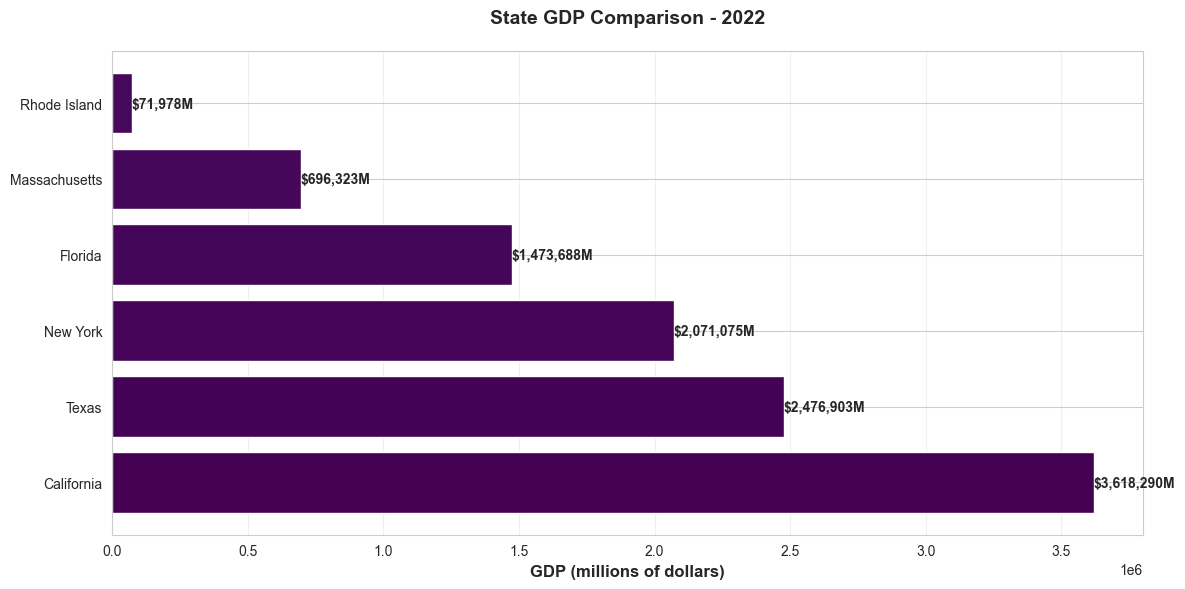

📊 GDP comparison shows economic output differences across states


In [5]:
# Create bar chart of latest GDP by state
# Note: This uses 'state_summary' from the GDP data cell above

try:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    states = state_summary['State'].values
    gdp_values = [float(x) for x in state_summary['GDP (millions)'].values]
    
    colors = plt.cm.viridis(range(len(states)))
    bars = ax.barh(states, gdp_values, color=colors)
    
    ax.set_xlabel('GDP (millions of dollars)', fontsize=12, fontweight='bold')
    ax.set_title(f'State GDP Comparison - {latest_year}', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars, gdp_values)):
        ax.text(value, bar.get_y() + bar.get_height()/2, 
                f'${value:,.0f}M', 
                ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f" GDP comparison shows economic output differences across states")
except NameError:
    print("  Please run the GDP data cell (Section 3) first to generate the data for visualization")

## 6. Common BEA Datasets

**Regional Data (get_regional_data):**
- `SQGDP` - State Quarterly GDP
- `SQINC` - State Quarterly Income
- `CAINC1` - Annual Personal Income
- `CAGDP2` - GDP by State and Industry

**Line Codes (common parameters):**
- `1` - Total/All industries
- `3` - Private industries
- Various industry-specific codes

**Geographic Codes:**
- `STATE` - State-level data
- `COUNTY` - County-level data
- `MSA` - Metropolitan Statistical Area
- Specific FIPS codes for individual areas

## 7. Summary & Next Steps

**What We Covered:**
-  Set up BEA connector with API key
-  Retrieved regional GDP data
-  Analyzed personal income by state
-  Compared economic output across states
-  Learned BEA dataset structures

**Next Steps:**
1. Explore industry-specific GDP data (CAGDP2 table)
2. Combine BEA data with other connectors (CBP, BLS, FRED)
3. Build regional economic dashboards
4. Analyze county and metro-level data
5. Track economic growth trends over time

**Resources:**
-  [BEA Data Homepage](https://www.bea.gov/data)
-  [Get API Key](https://apps.bea.gov/api/signup/)
-  [BEA API Docs](https://apps.bea.gov/api/signup/index.cfm)
-  [Regional Data Guide](https://www.bea.gov/data/gdp/gdp-state)
-  [GitHub Repository](https://github.com/KR-Labs/krl-data-connectors)
-  [More Examples](https://github.com/KR-Labs/krl-data-connectors/tree/main/examples)